In [204]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import lxml
import requests
from bs4 import BeautifulSoup
import urllib.request
import random
import seaborn as sns

%matplotlib inline
from matplotlib import style
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
plt.style.use('ggplot')
# plt.style.use('default')


In [42]:
# Scrape S&P 500 Wikipedia Site

# Using url
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# open url with urllib.request
page = urllib.request.urlopen(url)

soup = BeautifulSoup(page, "lxml")

In [49]:
# Get the tickers table
table = soup.find('table', class_='wikitable sortable')

In [54]:
# Convert table to df
tickers = pd.read_html(str(table))[0]

In [55]:
tickers

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [63]:
tickers_only = list(tickers['Symbol'])

In [161]:
# Download all the stocks (might take some time)
stocks = yf.download(tickers_only)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: 1d data not available for startTime=-2208988800 and endTime=1592776799. Only 100 years worth of day granularity data are allowed to be fetched per request.
- BRK.B: No data found, symbol may be delisted


In [235]:
# If you only want a few tickers
tickers_short = stocks.iloc[:,100:110]

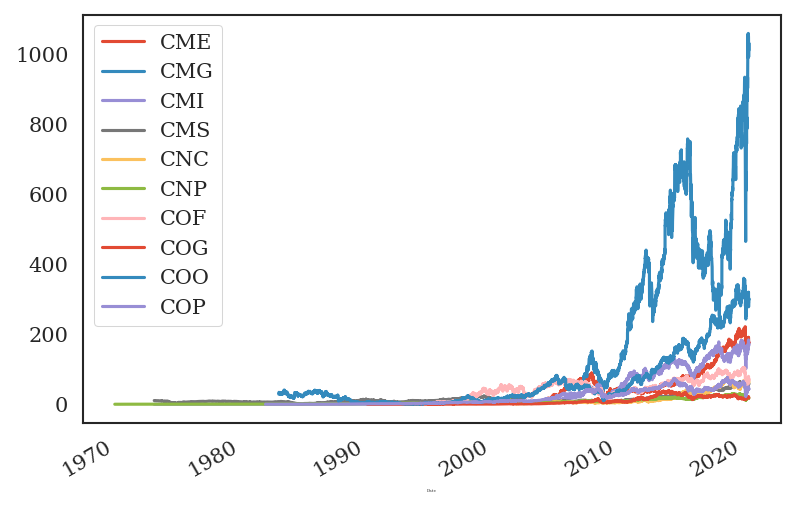

In [236]:
tickers_short['Adj Close'].plot()

In [160]:
index = yf.download('SPY')

[*********************100%***********************]  1 of 1 completed


In [184]:
stocks_close = stocks['Adj Close']

In [185]:
index_close = index[['Adj Close']]

In [195]:
index_close.columns = ['S&P500']

In [196]:
df = pd.concat([stocks_close, index_close], axis=1)

In [209]:
df_ret = df.pct_change()

In [210]:
corr = df_ret.corr()

In [215]:
# Check which are most/least correlated with the market
corr_list = corr['S&P500'].sort_values()
corr_list

TT        0.026499
NVR       0.035677
NEM       0.147347
MNST      0.202506
CARR      0.212354
            ...   
DOW       0.745446
AMP       0.791025
S&P500    1.000000
BF.B           NaN
BRK.B          NaN
Name: S&P500, Length: 506, dtype: float64

In [216]:
# Least Correlated
corr_list[:10]

TT      0.026499
NVR     0.035677
NEM     0.147347
MNST    0.202506
CARR    0.212354
COO     0.231128
TSCO    0.241596
ABMD    0.263432
AMCR    0.300936
ODFL    0.301858
Name: S&P500, dtype: float64

In [232]:
# Most Correlated
corr_list[493:503]

ALLE    0.714915
PFG     0.716262
AXP     0.716503
PRU     0.717064
GS      0.720723
DFS     0.725908
TEL     0.732954
FTV     0.736203
DOW     0.745446
AMP     0.791025
Name: S&P500, dtype: float64

In [242]:
cor_short = corr.iloc[493:,493:]

In [243]:
cor_short

,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,S&P500
WYNN,1.000000,0.231642,0.336908,0.386405,0.379484,0.438247,0.408425,0.391573,0.356760,0.367177,0.400373,0.346037,0.548180
XEL,0.231642,1.000000,0.174401,0.312540,0.153777,0.197796,0.353873,0.231642,0.217165,0.151777,0.151358,0.343453,0.414813
XLNX,0.336908,0.174401,1.000000,0.215475,0.212445,0.290126,0.460311,0.257293,0.261451,0.286394,0.211498,0.352999,0.520257
XOM,0.386405,0.312540,0.215475,1.000000,0.207871,0.307449,0.540719,0.336207,0.421948,0.234749,0.253199,0.401122,0.631945
XRAY,0.379484,0.153777,0.212445,0.207871,1.000000,0.202100,0.430476,0.301733,0.464192,0.218262,0.209474,0.407735,0.459363
XRX,0.438247,0.197796,0.290126,0.307449,0.202100,1.000000,0.484236,0.291288,0.378715,0.270052,0.271848,0.400745,0.493866
XYL,0.408425,0.353873,0.460311,0.540719,0.430476,0.484236,1.000000,0.424108,0.426678,0.418742,0.506854,0.461323,0.690066
YUM,0.391573,0.231642,0.257293,0.336207,0.301733,0.291288,0.424108,1.000000,0.361676,0.254106,0.319395,0.429100,0.507722
ZBH,0.356760,0.217165,0.261451,0.421948,0.464192,0.378715,0.426678,0.361676,1.000000,0.315897,0.325521,0.445026,0.536231
ZBRA,0.367177,0.151777,0.286394,0.234749,0.218262,0.270052,0.418742,0.254106,0.315897,1.000000,0.224011,0.377027,0.434531


<Figure size 7500x7500 with 0 Axes>

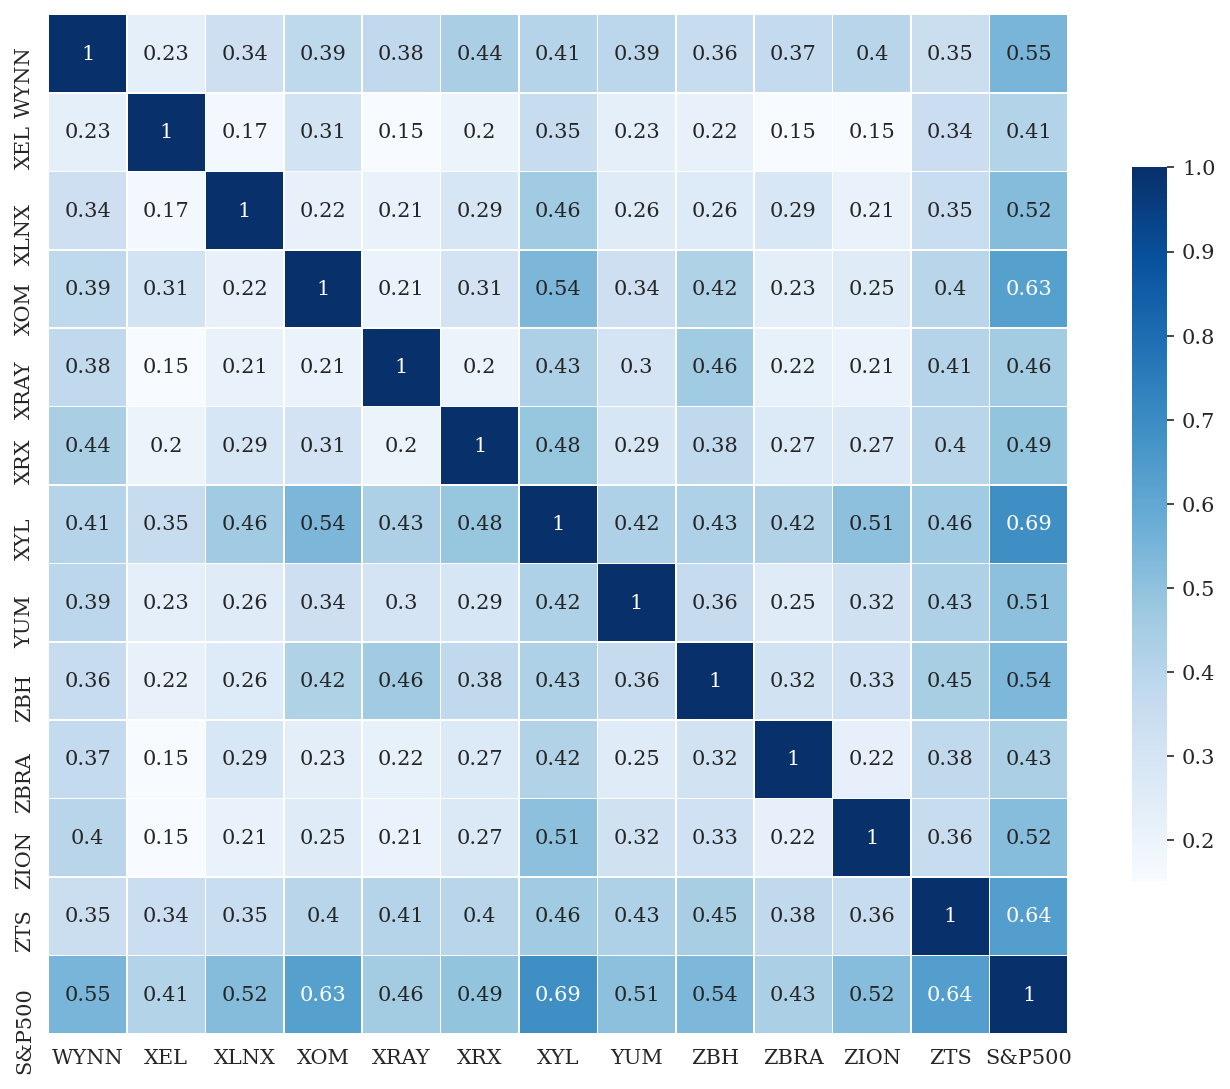

In [247]:
# Making a heatmap of correlations

def CorrMtx(cor, dropDuplicates = True):
    plt.figure(figsize=(50, 50)) # width and height in inches
    

    # Exclude duplicate correlations 
    if dropDuplicates:    
        mask = np.zeros_like(df_heat, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    #sns.set_style(style = 'white')
    sns.set_style('white', {'font.family':'serif', 'font.serif':'Garamond'})    
    
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    
    
    # Draw correlation plot with or without duplicates
    plt.rcParams["axes.labelsize"] = 2
    if dropDuplicates:
        sns.heatmap(cor, annot=True, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.3, cbar_kws={"shrink": 0.7}, annot_kws={"size": 10}, ax=ax)
    else:
        sns.heatmap(cor, annot=True, cmap='Blues', 
                square=True,
                linewidth=.3, cbar_kws={"shrink": 0.7}, annot_kws={"size": 10}, ax=ax)

CorrMtx(cor_short, dropDuplicates = False)
